In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip


In [2]:
pwd

'/kaggle/working'

## Extract Data

In [3]:
# unzip the files 

from zipfile import ZipFile
from pathlib import Path

# set the paths for the output
output_path = Path('/kaggle/working/data')
output_path.mkdir(exist_ok=True)

# extract the train files
train_zip = ZipFile('/kaggle/input/nyc-taxi-trip-duration/train.zip')

train_zip.extractall(output_path / 'train')

#extract the test files
test_zip = ZipFile('/kaggle/input/nyc-taxi-trip-duration/test.zip')

test_zip.extractall(output_path / 'test')

In [4]:
# load the dataframe

training_data_path = Path('/kaggle/working/data/train/train.csv')

# check if the path exists
if training_data_path.exists():
    print("The data path exists")
else:
    print('The data path does not exist')

The data path exists


In [5]:
train_df = pd.read_csv(training_data_path)

train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
# shape of training data

train_df.shape

(1458644, 11)

## Drop Columns

In [7]:
# remove unwanted columns from the data

train_df.columns[train_df.columns.isin(['id',
                      'dropoff_datetime',
                      'store_and_fwd_flag'])]

Index(['id', 'dropoff_datetime', 'store_and_fwd_flag'], dtype='object')

In [8]:
# remove the columns from training data

train_df.drop(columns=train_df.columns[train_df.columns.isin(['id',
                      'dropoff_datetime',
                      'store_and_fwd_flag'])],inplace=True)

In [9]:
train_df.shape

(1458644, 8)

In [10]:
train_df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,455
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,663
2,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,429
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,435


## Target Column

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


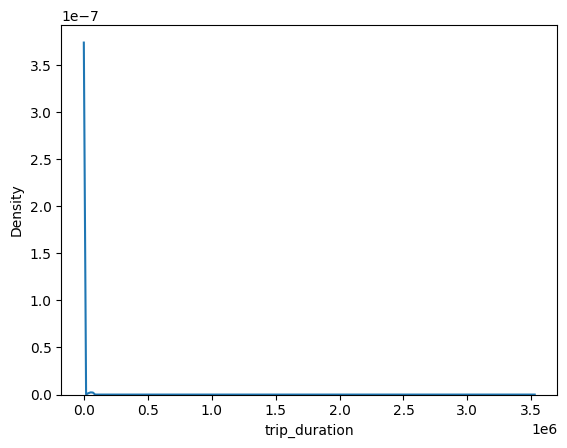

In [11]:
# distribution of the trip duration column

import seaborn as sns

sns.kdeplot(train_df['trip_duration']);

In [12]:
# check for missing values in data

train_df.isna().sum()

vendor_id            0
pickup_datetime      0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
trip_duration        0
dtype: int64

In [13]:
# skewness of the output column

train_df['trip_duration'].skew()

343.1639435917362

**The target column is extremely right skewed in nature**

In [14]:
# apply reciprocal transformation on data

# check for 0 in target

print('The minimum value in target data is',train_df['trip_duration'].min())

target_reciprocal_trans = train_df['trip_duration'].apply(lambda x: 1/x)

The minimum value in target data is 1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


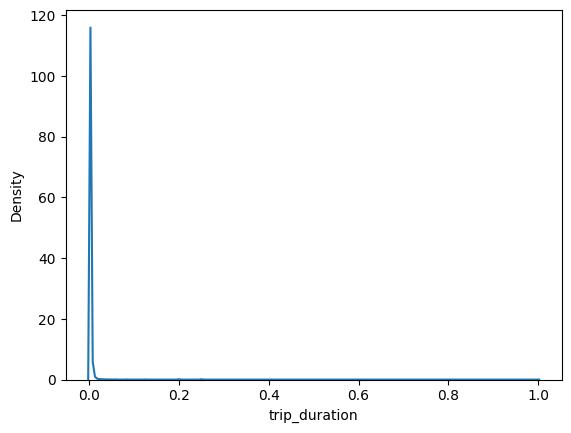

In [15]:
# distribution of target column after reciprocal transformation

sns.kdeplot(target_reciprocal_trans);

In [16]:
# skewness ater reciprocal transformation

target_reciprocal_trans.skew()

40.049787641971186

In [17]:
# apply log transformation on the data

target_log_trans = train_df['trip_duration'].apply(np.log)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


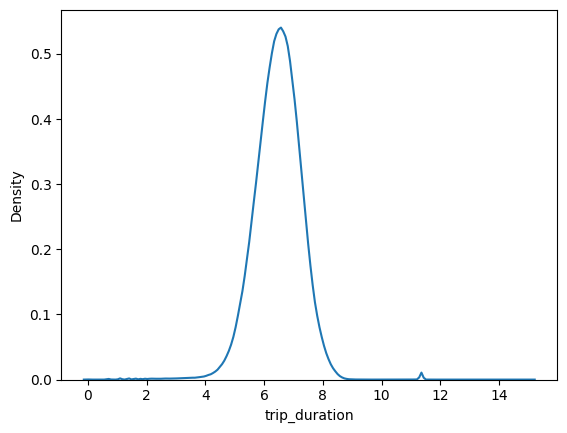

In [18]:
# distribution of target column after log transformation

sns.kdeplot(target_log_trans);

In [19]:
target_log_trans.skew()

-0.34070423044801745

**Log transformation worked far better as compared to reciprocal transformation for the target column in reducing the skeweness of data**

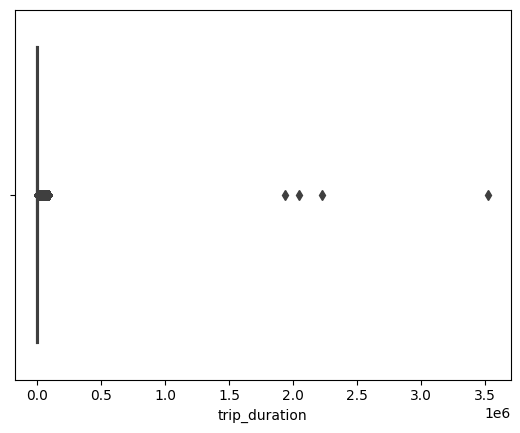

In [20]:
# checking for outliers in the target data

# plot box plot
sns.boxplot(data=train_df,x='trip_duration');

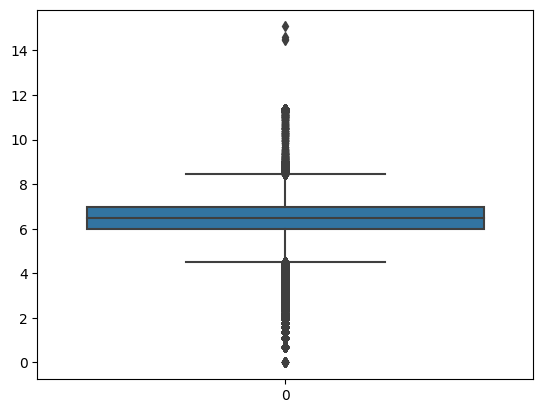

In [21]:
# outliers in data after log transformation

sns.boxplot(target_log_trans);

In [22]:
DURATION_THRESH = 200 * 60

In [23]:
# rows of data that are above 200 minutes

target_below_200 = train_df.loc[train_df['trip_duration'] <= DURATION_THRESH,'trip_duration']

In [24]:
# number of rows dropped in the process

train_df.shape[0] - target_below_200.shape[0]

2096

In [25]:
# percentage of total data rows dropped

print('The number of rows dropped when target above 200 minutes are removed',
      train_df.shape[0] - target_below_200.shape[0])

print('\nPercentage of rows dropped when target above 200 minutes are removed',
      f'{(train_df.shape[0] - target_below_200.shape[0])/train_df.shape[0]:.2%}')

The number of rows dropped when target above 200 minutes are removed 2096

Percentage of rows dropped when target above 200 minutes are removed 0.14%


**Not a lot of rows are dropped as compared to the size of the data**

<Axes: >

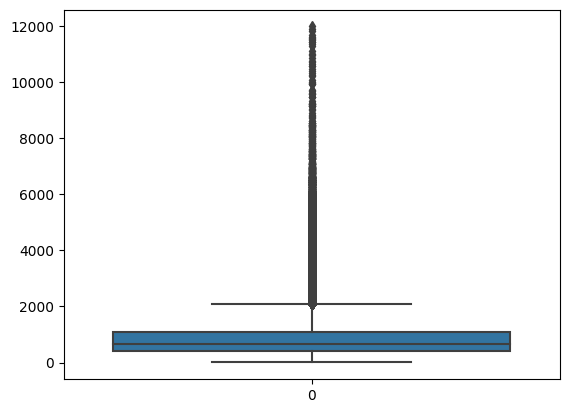

In [26]:
# boxplot after removal of data

sns.boxplot(target_below_200)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


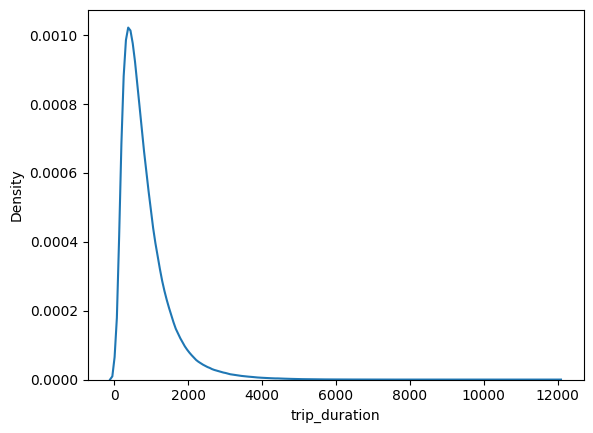

In [27]:
# distribution of target after removing 200 rows

sns.kdeplot(target_below_200);

### Target Column Transformations

In [28]:
# log transform this data

target_below_200_log_transformed = target_below_200.apply(np.log)

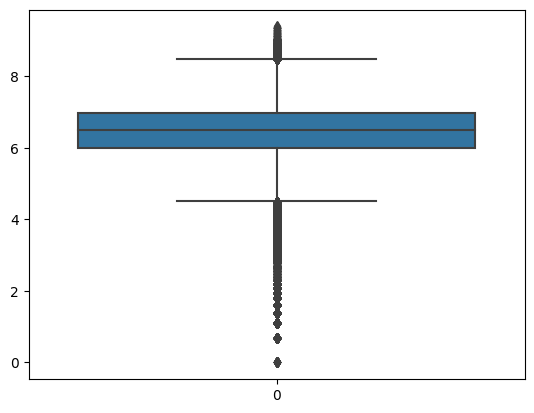

In [29]:
# boxplot after removal of data and log transformation

sns.boxplot(target_below_200_log_transformed);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


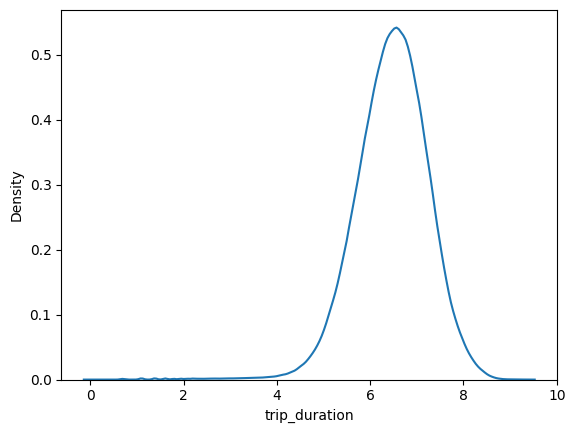

In [30]:
# distribution of target after removing 200 rows and log transformation

sns.kdeplot(target_below_200_log_transformed);

In [31]:
print('The skewness of target before log transformation',target_below_200.skew())

print('\nSkewness of target after log transformation',target_below_200_log_transformed.skew())

The skewness of target before log transformation 2.337972890769571

Skewness of target after log transformation -0.6887975071074691


#### Power Transformations

In [32]:
# yeo johnson transformation on the target column

from sklearn.preprocessing import PowerTransformer

pt_target = PowerTransformer()

pt_target

PowerTransformer()

In [33]:
target_below_200

0           455
1           663
2          2124
3           429
4           435
           ... 
1458639     778
1458640     655
1458641     764
1458642     373
1458643     198
Name: trip_duration, Length: 1456548, dtype: int64

In [34]:
# fit on the training data

pt_target.fit(target_below_200.to_frame())

PowerTransformer()

In [35]:
# transform the target column

target_power_trans = pt_target.transform(target_below_200.to_frame())

target_power_trans

array([[-0.50188624],
       [-0.01972708],
       [ 1.69949474],
       ...,
       [ 0.17065257],
       [-0.74328395],
       [-1.45623401]])

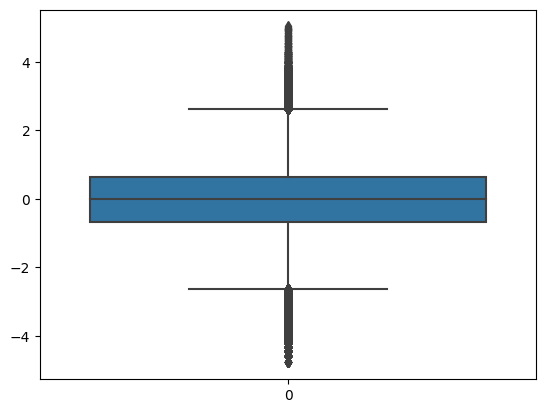

In [36]:
# boxplot after power transformation

sns.boxplot(target_power_trans);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


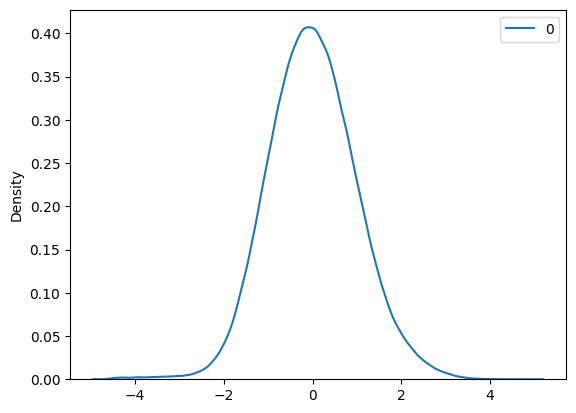

In [37]:
# distribution of target after power transformation

sns.kdeplot(target_power_trans);

In [38]:
print('The skewness of target before power transformation',target_below_200.skew())

print('\nSkewness of target after power transformation',pd.Series(target_power_trans.ravel()).skew())

The skewness of target before power transformation 2.337972890769571

Skewness of target after power transformation 0.032368541395952605


**It is quite evident fronm the observations that for the given dataset yeo-johnson technique works better as compared to the others**

In [39]:
pt_target.lambdas_[0]

0.1816048673119821

In [40]:
# apply both the techniques and compare skeness

transformation_methods = ['yeo-johnson','box-cox']

skewness = [target_below_200.skew()]
methods = ['original']
lambdas = [np.NaN]

for method in transformation_methods:
    methods.append(method)
    pt_target = PowerTransformer(method=method)
    # fit  and transform on the training data
    target_trans = pt_target.fit(target_below_200.to_frame())
    # skewness after transform
    skew = pd.Series(target_power_trans.ravel()).skew()
    skewness.append(skew)
    # get the lambda value
    lambdas.append(f'{pt_target.lambdas_[0]:.3f}')
    
results_df = pd.DataFrame(data={
    'methods':methods,
    'skewness':skewness,
    'lambdas':lambdas
})

results_df

,methods,skewness,lambdas
0,original,2.337973,NaN
1,yeo-johnson,0.032369,0.182
2,box-cox,0.032369,0.187


## Outlier Removal from Lat/Long columns

In [41]:
import matplotlib.pyplot as plt

In [42]:
new_df = train_df.loc[train_df['trip_duration'] <= DURATION_THRESH,:]

new_df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,455
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,663
2,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,429
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,435


In [43]:
# distribution of lat long columns

def plot_density_plots(df):
    fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
    # density plot for pickup latitude
    sns.kdeplot(data=df,x='pickup_latitude',ax=ax1[0])
    # density plot for dropoff latitude
    sns.kdeplot(data=df,x='dropoff_latitude',ax=ax1[1])
    # density plot for pickup longitude
    sns.kdeplot(data=df,x='pickup_longitude',ax=ax2[0])
    # density plot for pickup longitude
    sns.kdeplot(data=df,x='dropoff_longitude',ax=ax2[1])
    
    
def plot_boxplots(df):
    fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
    # density plot for pickup latitude
    sns.boxplot(data=df,y='pickup_latitude',ax=ax1[0])
    # density plot for dropoff latitude
    sns.boxplot(data=df,y='dropoff_latitude',ax=ax1[1])
    # density plot for pickup longitude
    sns.boxplot(data=df,y='pickup_longitude',ax=ax2[0])
    # density plot for pickup longitude
    sns.boxplot(data=df,y='dropoff_longitude',ax=ax2[1])


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

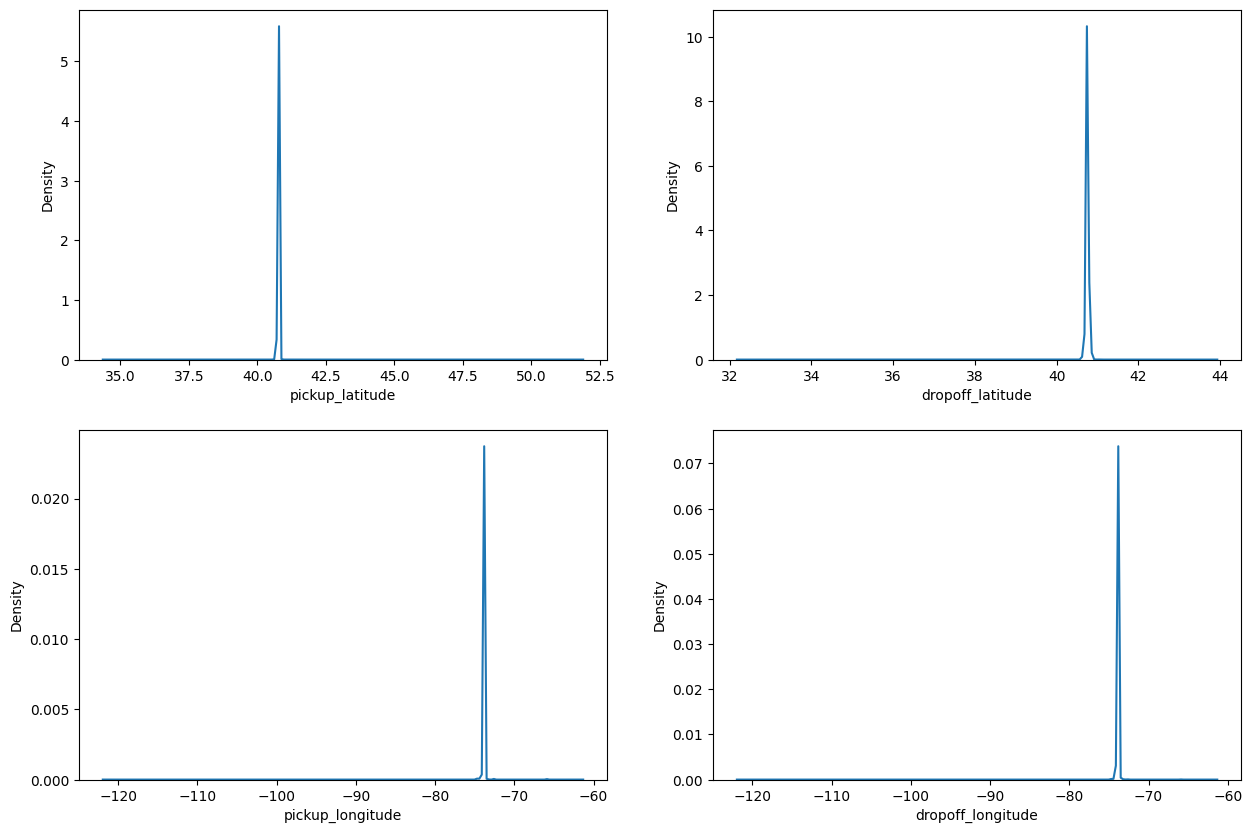

In [44]:
# plot density plots

plot_density_plots(new_df)

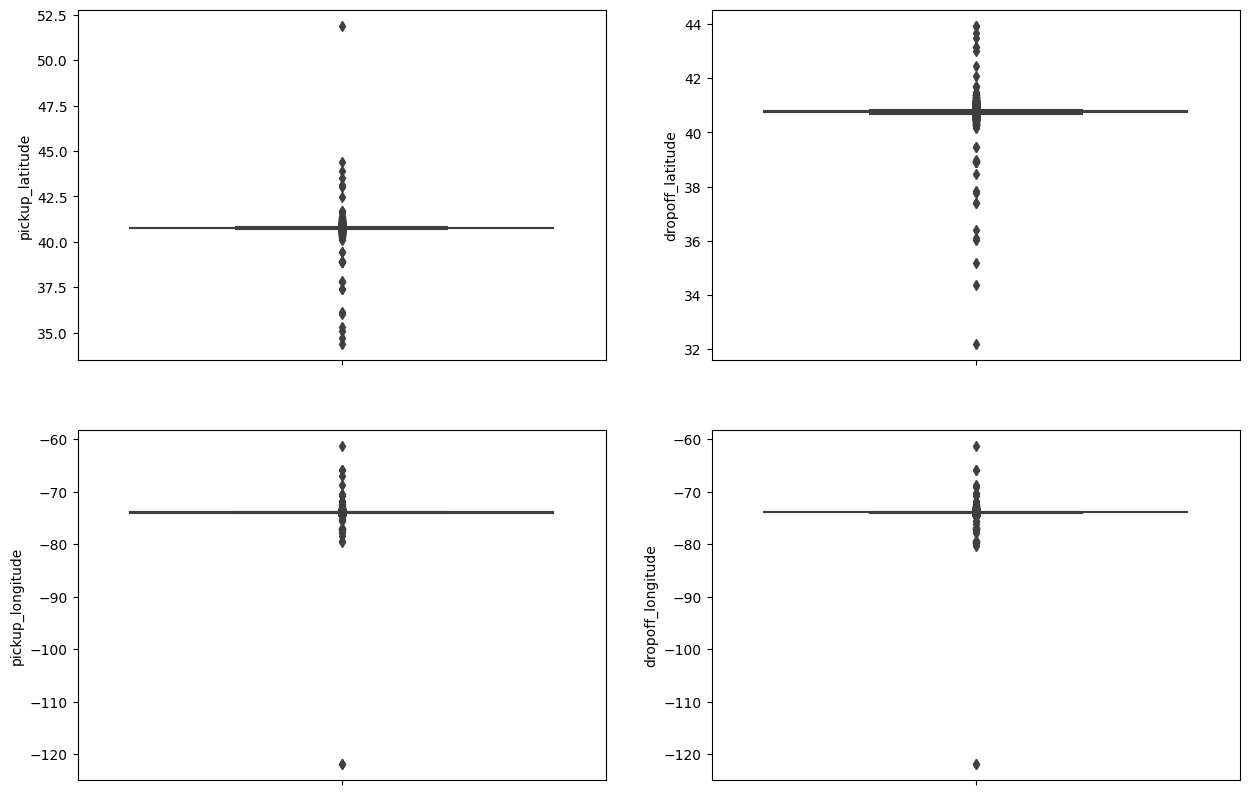

In [45]:
# plot boxplots

plot_boxplots(new_df)

In [69]:
# function to remove outliers from data

def remove_outliers(percentiles,column_names):
    original_number_of_rows = new_df.shape[0]
    rows_removed = {}
    df_after_removal = new_df.copy()
    for column_name in column_names:
        # calculate the values in data for the given percentiles
        quantile_values = new_df[column_name].quantile(list(percentiles))
        # create data filter
        data_filter = (new_df[column_name] >= quantile_values.iloc[0]) & (new_df[column_name] <= quantile_values.iloc[1])
        # filter out the data
        df_after_removal = df_after_removal.loc[data_filter,:]
        # number of rows removed 
        rows_removed[column_name] = original_number_of_rows - df_after_removal.shape[0]
        # set the number of rows
        original_number_of_rows = df_after_removal.shape[0]
    print(rows_removed)
    
    return df_after_removal, rows_removed

In [79]:
PERCENTILE_VALUES = (0.002,0.998)

In [80]:
new_df.columns[3:7]

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [81]:
# columns to remove outliers from

outlier_cols = new_df.columns[3:7]

outlier_cols

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [82]:
# remove outliers from data

df_without_outliers,removal_dict = remove_outliers(percentiles=PERCENTILE_VALUES,column_names=outlier_cols)

{'pickup_longitude': 5698, 'pickup_latitude': 5479, 'dropoff_longitude': 5032, 'dropoff_latitude': 4700}


In [83]:
removal_dict

{'pickup_longitude': 5698,
 'pickup_latitude': 5479,
 'dropoff_longitude': 5032,
 'dropoff_latitude': 4700}

In [84]:
sum(removal_dict.values())

20909

In [85]:
# percentage of data points removed after outliers removal

per_of_data_removed = (new_df.shape[0] - df_without_outliers.shape[0])/new_df.shape[0]

print(f'Percentage of data points removed after outlier removal from Lat/Long columns is {per_of_data_removed:.2%}')

Percentage of data points removed after outlier removal from Lat/Long columns is 1.44%


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

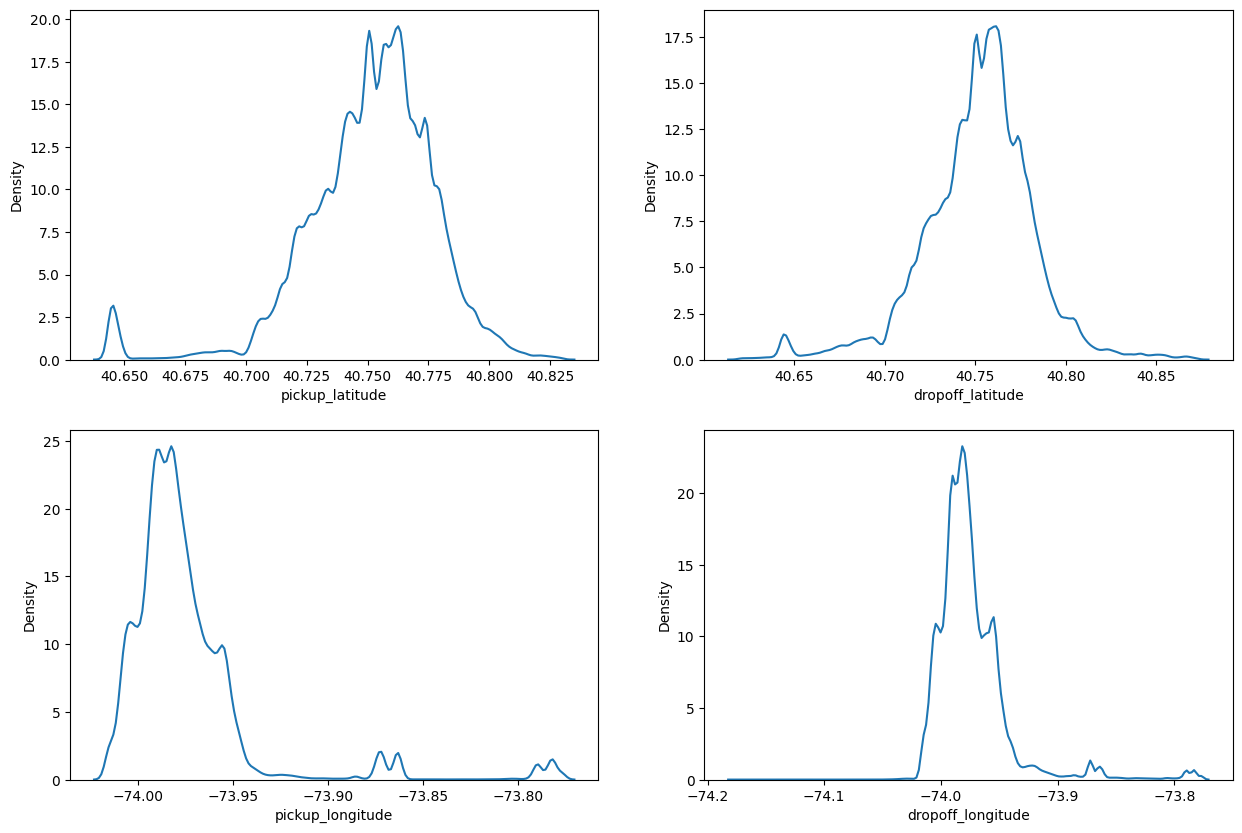

In [86]:
# plot density plots after outlier_removal

plot_density_plots(df_without_outliers)

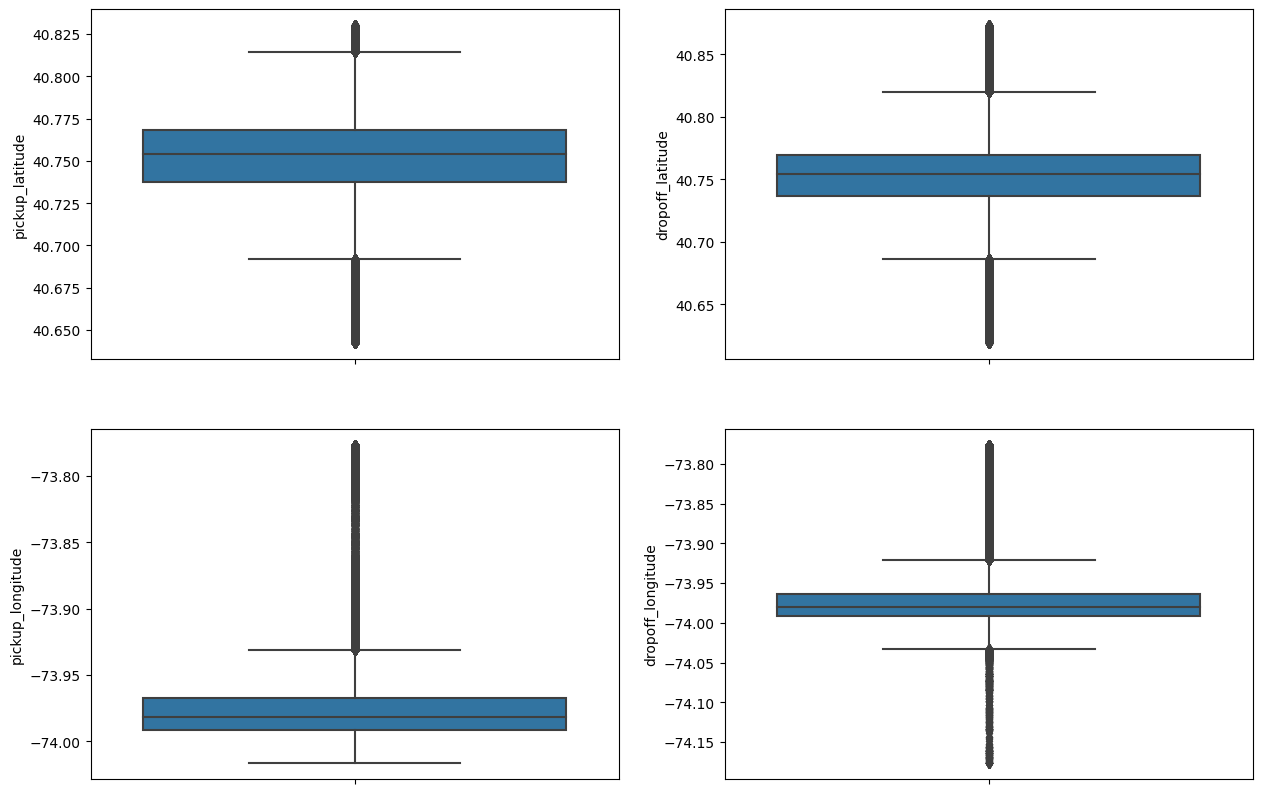

In [87]:
# plot boxplots after outlier removal

plot_boxplots(df_without_outliers)

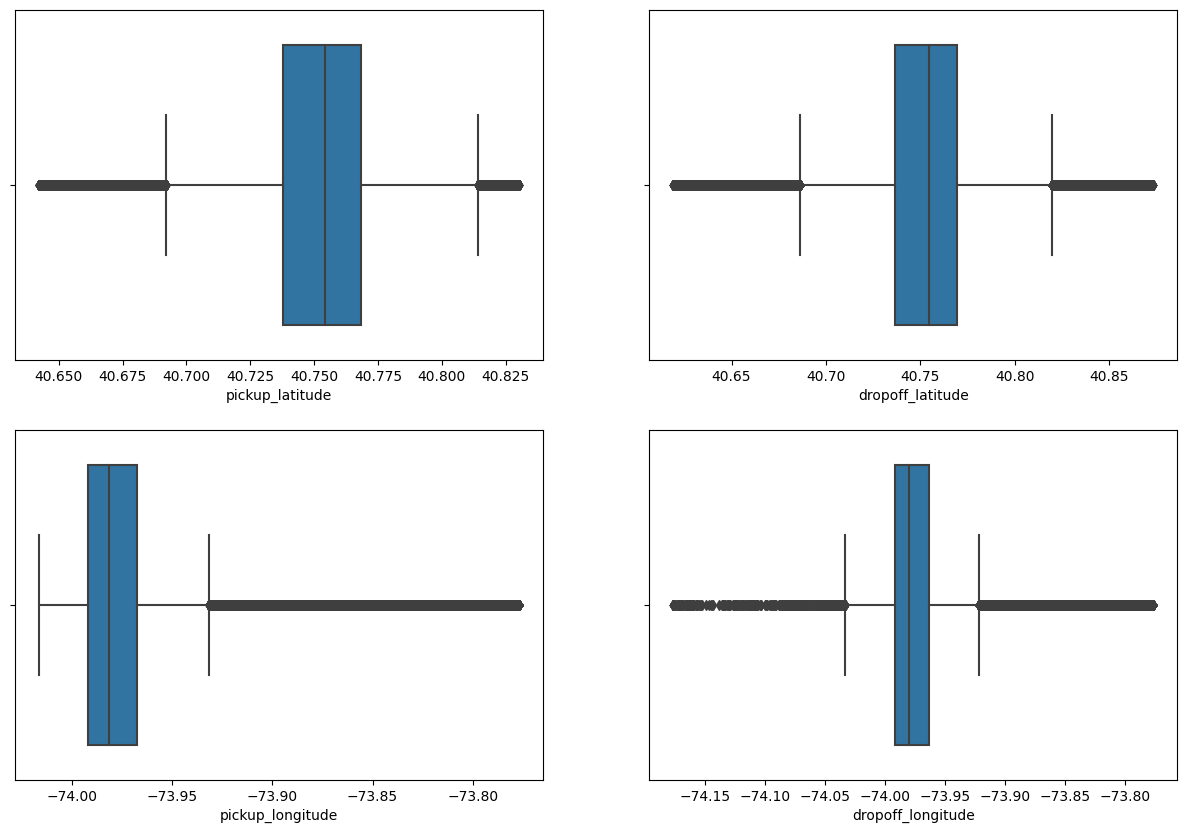

In [103]:
def plot_boxplots(df):
    fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
    # density plot for pickup latitude
    sns.boxplot(data=df,x='pickup_latitude',ax=ax1[0])
    # density plot for dropoff latitude
    sns.boxplot(data=df,x='dropoff_latitude',ax=ax1[1])
    # density plot for pickup longitude
    sns.boxplot(data=df,x='pickup_longitude',ax=ax2[0])
    # density plot for pickup longitude
    sns.boxplot(data=df,x='dropoff_longitude',ax=ax2[1])

    
# plot boxplots after outlier removal

plot_boxplots(df_without_outliers)

In [105]:
# skewness of lat/long columns

df_without_outliers[outlier_cols].skew().to_frame(name='skewness').iloc[[1,3,0,2]]

,skewness
pickup_latitude,-1.101700
dropoff_latitude,-0.485723
pickup_longitude,3.341363
dropoff_longitude,2.867819


In [89]:
def apply_transformation(func):
    for i in range(len(func)):
        original_skew = df_without_outliers[f'{list(outlier_cols)[i]}'].skew()
        print(f'The skewness of column {list(outlier_cols)[i]} before transformation is {original_skew}')
        skewness_after_transformation = df_without_outliers[f'{list(outlier_cols)[i]}'].apply(func[i]).skew()
        print(f'The skewness of column {list(outlier_cols)[i]} after transformation is {skewness_after_transformation}')
        print('\n','*'*30,'\n')

In [90]:
log_func = lambda x : -np.log(abs(x))
cube_func = lambda x: x**3

In [91]:
function_list = [log_func,cube_func,log_func,cube_func]

apply_transformation(func=function_list)

The skewness of column pickup_longitude before transformation is 3.34136276335352
The skewness of column pickup_longitude after transformation is 3.3446186975280146

 ****************************** 

The skewness of column pickup_latitude before transformation is -1.101700482506364
The skewness of column pickup_latitude after transformation is -1.0940057075543879

 ****************************** 

The skewness of column dropoff_longitude before transformation is 2.867818797501469
The skewness of column dropoff_longitude after transformation is 2.8718140021587675

 ****************************** 

The skewness of column dropoff_latitude before transformation is -0.48572306780467744
The skewness of column dropoff_latitude after transformation is -0.4769448478791475

 ****************************** 



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


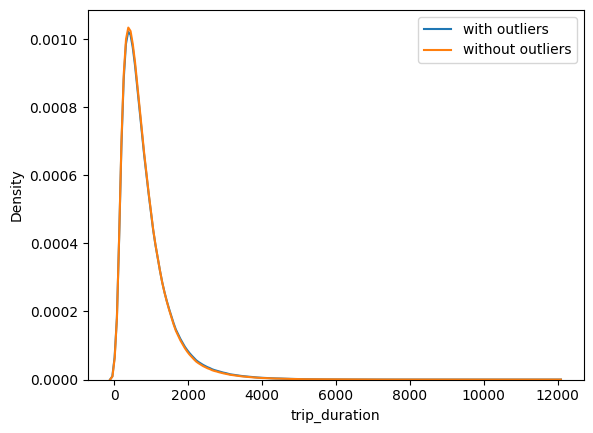

In [96]:
# target data distribution with and without outliers

sns.kdeplot(data=new_df,x='trip_duration',label='with outliers')
sns.kdeplot(data=df_without_outliers,x='trip_duration',label='without outliers')

plt.legend()
plt.show()

## Passenger count

In [92]:
df_without_outliers.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,455
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,663
2,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,429
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,435


In [94]:
new_df['trip_duration'].max() / 60

199.56666666666666

In [97]:
df_without_outliers['passenger_count'].value_counts()

passenger_count
1    1017699
2     206726
5      76789
3      58932
6      47552
4      27888
0         52
8          1
Name: count, dtype: int64

In [99]:
# remove passengers 0 and 8 from data

final_df = df_without_outliers.loc[~df_without_outliers['passenger_count'].isin([0,8]),:]

In [100]:
# compare the shapes

print('The shape of data before removing rows of passengers 0 and 8',df_without_outliers.shape[0])
print('\nThe shape of data after removing rows of passengers 0 and 8',final_df.shape[0])
print(f'\nThe difference is 53 rows --> {(df_without_outliers.shape[0] - final_df.shape[0]) == 53}')

The shape of data before removing rows of passengers 0 and 8 1435639

The shape of data after removing rows of passengers 0 and 8 1435586

The difference is 53 rows --> True


In [101]:
# save the final_df

save_path = Path('/kaggle/working/data/output')

save_path.mkdir(exist_ok=True)

final_df.to_csv(path_or_buf=save_path / 'final_df.csv',index=False)

In [102]:
# load the final_df back

final_df_copy = pd.read_csv(save_path / 'final_df.csv')

final_df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,455
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,663
2,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,429
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,435
